In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the csv
reviews_df = pd.read_csv("reviews.csv")

# Display data table for preview
reviews_df.head()

,listing_id,month,day,Year
0,1419,7,19,2015
1,1419,8,29,2015
2,1419,9,7,2015
3,1419,3,28,2016
4,1419,8,3,2017


In [2]:
reviews_df.shape

(470371, 4)

Some listings have more than 1 review per year (multiple rows). Keeping 1 only to represent a rented listing in that particular year.

In [3]:
# Remove duplicates 
clean_df = reviews_df.drop_duplicates(subset=["listing_id", "Year"])
clean_df.shape

(32722, 4)

In [4]:
# Use groupby to count the number of rented listing per year
airbnb = clean_df.groupby("Year").count()["listing_id"]
airbnb

Year
2009        1
2010        9
2011       42
2012      135
2013      357
2014      833
2015     2249
2016     4623
2017     7640
2018    13234
2019     3599
Name: listing_id, dtype: int64

In [5]:
# Drop 2019 since this data is incomplete - 2019 is not done yet.
airbnb = airbnb.drop(airbnb.index[10])
airbnb

Year
2009        1
2010        9
2011       42
2012      135
2013      357
2014      833
2015     2249
2016     4623
2017     7640
2018    13234
Name: listing_id, dtype: int64

Text(0, 0.5, 'Number of Rented Airbnb')

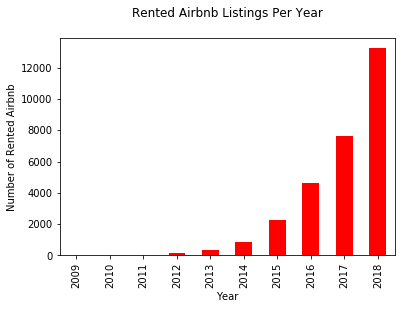

In [6]:
# Create bar graph - series method
airbnb_chart = airbnb.plot(kind="bar", title = "Rented Airbnb Listings Per Year\n", color="red")

airbnb_chart.set_xlabel("Year")
airbnb_chart.set_ylabel("Number of Rented Airbnb")

In [7]:
# Save Figure
plt.savefig("Rented_Airbnb_Listings_Per_Year.png")

<Figure size 432x288 with 0 Axes>

In [8]:
# Read the CSV
mls_df = pd.read_csv("MLS_Summary.csv")

# Display data table for preview
mls_df.set_index('Year', inplace=True)
mls_df

,MLS_Listed,MLS_Leased
Year,,
2012,"24,397","13,641"
2013,"30,760","16,538"
2014,"35,828","19,562"
2015,"44,980","24,878"
2016,"36,776","24,188"
2017,"35,181","23,659"
2018,"36,373","23,792"


In [9]:
mls_df.dtypes

MLS_Listed    object
MLS_Leased    object
dtype: object

Methods we tried converting string to float that all did not work...
A) mls_df = pd.read_csv("MLS_Summary.csv", dtype={"MLS_Listed":float})
B) mls_df['MLS_Listed'] = pd.to_numeric(mls_df['MLS_Listed'])
C) mls_df.MLS_Listed.astype(dtype=float)

In [10]:
# Remove , on dataset
mls_df['MLS_Listed']  = mls_df['MLS_Listed'].apply(lambda x: int(x.replace(",", "")))
mls_df['MLS_Leased']  = mls_df['MLS_Leased'].apply(lambda x: int(x.replace(",", "")))

In [11]:
mls_df.dtypes

MLS_Listed    int64
MLS_Leased    int64
dtype: object

In [12]:
airbnb = pd.DataFrame(airbnb)
airbnb = airbnb.rename(columns={"listing_id": "Airbnb_Leased"})
airbnb

,Airbnb_Leased
Year,
2009,1
2010,9
2011,42
2012,135
2013,357
2014,833
2015,2249
2016,4623
2017,7640


In [13]:
merge_table = pd.merge(mls_df, airbnb, left_index=True, right_index=True)
merge_table

,MLS_Listed,MLS_Leased,Airbnb_Leased
Year,,,
2012,24397,13641,135
2013,30760,16538,357
2014,35828,19562,833
2015,44980,24878,2249
2016,36776,24188,4623
2017,35181,23659,7640
2018,36373,23792,13234


Text(0.5, 1.0, 'Listing Comparison')

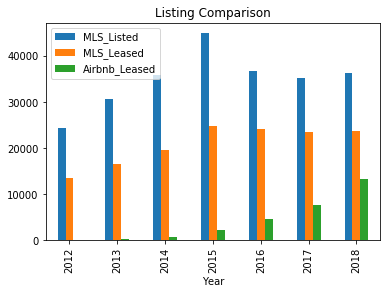

In [14]:
merge_chart = merge_table.plot(kind="bar")

merge_chart

plt.title("Listing Comparison")

In [15]:
# Save Figure
plt.savefig("Listing_Comparison.png")

<Figure size 432x288 with 0 Axes>

In [16]:
from statsmodels.formula.api import ols

In [17]:
result = ols(formula="MLS_Leased ~ Airbnb_Leased", data=merge_table).fit()

In [18]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             MLS_Leased   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     3.247
Date:                Wed, 13 Mar 2019   Prob (F-statistic):              0.131
Time:                        14:04:14   Log-Likelihood:                -66.366
No. Observations:                   7   AIC:                             136.7
Df Residuals:                       5   BIC:                             136.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.852e+04   1935.289      9.570

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


In [19]:
result = ols(formula="MLS_Listed ~ Airbnb_Leased", data=merge_table).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             MLS_Listed   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                 -0.106
Method:                 Least Squares   F-statistic:                    0.4255
Date:                Wed, 13 Mar 2019   Prob (F-statistic):              0.543
Time:                        14:04:14   Log-Likelihood:                -70.309
No. Observations:                   7   AIC:                             144.6
Df Residuals:                       5   BIC:                             144.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.339e+04   3399.367      9.823

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)
